In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

In [2]:
prosper_data = pd.read_csv("./prosperLoanData_clean.csv")

In [58]:
prosper_data.head()

,Term,LoanStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,AverageCreditScore,Occupation-Accountant/CPA,Occupation-Administrative Assistant,Occupation-Analyst,Occupation-Architect,Occupation-Attorney,Occupation-Biologist,Occupation-Bus Driver,Occupation-Car Dealer,Occupation-Chemist,Occupation-Civil Service,Occupation-Clergy,Occupation-Clerical,Occupation-Computer Programmer,Occupation-Construction,Occupation-Dentist,Occupation-Doctor,Occupation-Engineer - Chemical,Occupation-Engineer - Electrical,Occupation-Engineer - Mechanical,Occupation-Executive,Occupation-Fireman,Occupation-Flight Attendant,Occupation-Food Service,Occupation-Food Service Management,Occupation-Homemaker,Occupation-Investor,Occupation-Judge,Occupation-Laborer,Occupation-Landscaping,Occupation-Medical Technician,Occupation-Military Enlisted,Occupation-Military Officer,Occupation-Nurse (LPN),Occupation-Nurse (RN),Occupation-Nurse's Aide,Occupation-Other,Occupation-Pharmacist,Occupation-Pilot - Private/Commercial,Occupation-Police Officer/Correction Officer,Occupation-Postal Service,Occupation-Principal,Occupation-Professional,Occupation-Professor,Occupation-Psychologist,Occupation-Realtor,Occupation-Religious,Occupation-Retail Management,Occupation-Sales - Commission,Occupation-Sales - Retail,Occupation-Scientist,Occupation-Skilled Labor,Occupation-Social Worker,Occupation-Student - College Freshman,Occupation-Student - College Graduate Student,Occupation-Student - College Junior,Occupation-Student - College Senior,Occupation-Student - College Sophomore,Occupation-Student - Community College,Occupation-Student - Technical School,Occupation-Teacher,Occupation-Teacher's Aide,Occupation-Tradesman - Carpenter,Occupation-Tradesman - Electrician,Occupation-Tradesman - Mechanic,Occupation-Tradesman - Plumber,Occupation-Truck Driver,Occupation-Waiter/Waitress,BorrowerState-AK,BorrowerState-AL,BorrowerState-AR,BorrowerState-AZ,BorrowerState-CA,BorrowerState-CO,BorrowerState-CT,BorrowerState-DC,BorrowerState-DE,BorrowerState-FL,BorrowerState-GA,BorrowerState-HI,BorrowerState-ID,BorrowerState-IL,BorrowerState-IN,BorrowerState-KS,BorrowerState-KY,BorrowerState-LA,BorrowerState-MA,BorrowerState-MD,BorrowerState-MI,BorrowerState-MN,BorrowerState-MO,BorrowerState-MS,BorrowerState-MT,BorrowerState-NC,BorrowerState-NE,BorrowerState-NH,BorrowerState-NJ,BorrowerState-NM,BorrowerState-NV,BorrowerState-NY,BorrowerState-OH,BorrowerState-OK,BorrowerState-OR,BorrowerState-PA,BorrowerState-RI,BorrowerState-SC,BorrowerState-SD,BorrowerState-TN,BorrowerState-TX,BorrowerState-UT,BorrowerState-VA,BorrowerState-VT,BorrowerState-WA,BorrowerState-WI,BorrowerState-WV,BorrowerState-WY,EmploymentStatus-Employed,EmploymentStatus-Full-time,EmploymentStatus-Other,EmploymentStatus-Part-time,EmploymentStatus-Retired,EmploymentStatus-Self-employed,LoanOriginationQuarter-Q1 2010,LoanOriginationQuarter-Q1 2011,LoanOriginationQuarter-Q1 2012,LoanOriginationQuarter-Q1 2013,LoanOriginationQuarter-Q1 2014,LoanOriginationQuarter-Q2 2010,LoanOriginationQuarter-Q2 2011,LoanOriginationQuarter-Q2 2012,LoanOriginationQuarter-Q2 2013,LoanOriginationQuarter-Q3 2009,LoanOriginationQuarter-Q3 2010,LoanOriginationQuarter-Q3 2011,LoanOriginationQuarter-Q3 2012,LoanOriginationQuarter-Q3 2013,LoanOriginationQuarter-Q4 2009,LoanOriginationQuarter-Q4 2010,LoanOriginationQuarter-Q4 2011,LoanOriginationQuarter-Q4 2012,LoanOriginationQuarter-Q4 2013,Lis

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
y = prosper_data.LoanStatus

In [5]:
X = prosper_data.drop(columns = ['LoanStatus'])

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=3)

In [7]:
os = SMOTE(random_state=0)
columns = Xtrain.columns

In [8]:
os_data_X,os_data_y=os.fit_sample(Xtrain, ytrain)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
os_data_X,os_data_y=os.fit_sample(Xtrain, ytrain)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  93496
Number of no subscription in oversampled data 46748
Number of subscription 46748
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [171]:
prosper_data_vars=prosper_data.columns.values.tolist()
y=['y']
X=[i for i in prosper_data_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 25)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False False  True False False False False False False False  True False
 False False False False  True False False False  True  True False  True
 False False  True False False False False False False False False False
 False False False False False False False False  True False False False
 False False False  True False False False False False False False False
 False False False False False False False  True False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False False  True False False False False
 False False False  True  True  True False False False False False False
 False  True False False False False False False Fa

In [18]:
prosper_data_vars

NameError: name 'prosper_data_vars' is not defined

In [10]:
cols=['IsBorrowerHomeowner','CurrentDelinquencies','BankcardUtilization','DebtToIncomeRatio','IncomeVerifiable',
     'PercentFunded','Occupation-Computer Programmer','Occupation-Executive','Occupation-Professional','Occupation-Food Service',
      'Occupation-Laborer','Occupation-Fireman','Occupation-Analyst','Occupation-Architect','Occupation-Teacher','Occupation-Waiter/Waitress',
     'BorrowerState-IL','BorrowerState-NY','BorrowerState-OH','BorrowerState-TX','BorrowerState-CO',
      'BorrowerState-MO','BorrowerState-LA','BorrowerState-CA', 'BorrowerState-MD',
      'EmploymentStatus-Employed','EmploymentStatus-Full-time','LoanOriginationQuarter-Q1 2014',
     'LoanOriginationQuarter-Q3 2012','LoanOriginationQuarter-Q4 2012','LoanOriginationQuarter-Q4 2013',
     'ListingCategory_numeric-1','ListingCategory_numeric-3','ListingCategory_numeric-7','Term','LoanOriginalAmount'] 

In [11]:
X=os_data_X[cols]
y=os_data_y['y']

In [12]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.577377
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.167      
Dependent Variable:      y                    AIC:                  108036.7871
Date:                    2019-11-27 15:24     BIC:                  108376.8314
No. Observations:        93496                Log-Likelihood:       -53982.    
Df Model:                35                   LL-Null:              -64806.    
Df Residuals:            93460                LLR p-value:          0.0000     
Converged:               1.0000               Scale:                1.0000     
No. Iterations:          8.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [15]:
result = logreg.predict_proba(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.55      0.63     14017
          1       0.64      0.80      0.71     14032

avg / total       0.69      0.68      0.67     28049



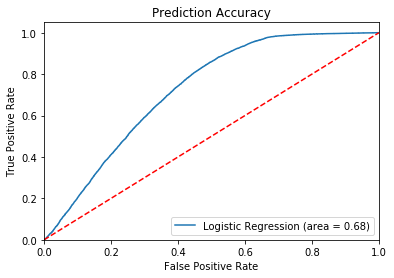

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prediction Accuracy')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [432]:
X_test.head()

,IsBorrowerHomeowner,CurrentDelinquencies,BankcardUtilization,DebtToIncomeRatio,IncomeVerifiable,PercentFunded,Occupation-Computer Programmer,Occupation-Executive,Occupation-Professional,Occupation-Food Service,Occupation-Laborer,Occupation-Fireman,Occupation-Analyst,Occupation-Architect,Occupation-Teacher,Occupation-Waiter/Waitress,BorrowerState-IL,BorrowerState-NY,BorrowerState-OH,BorrowerState-TX,BorrowerState-CO,BorrowerState-MO,BorrowerState-LA,BorrowerState-CA,BorrowerState-MD,EmploymentStatus-Employed,EmploymentStatus-Full-time,LoanOriginationQuarter-Q1 2014,LoanOriginationQuarter-Q3 2012,LoanOriginationQuarter-Q4 2012,LoanOriginationQuarter-Q4 2013,ListingCategory_numeric-1,ListingCategory_numeric-3,ListingCategory_numeric-7,Term,LoanOriginalAmount
18497,1.000000,0.0,0.340000,0.270000,1.0,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,36.0,9500.000000
3340,1.000000,0.0,0.900000,0.160000,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.0,36.0,12000.000000
8634,0.000000,0.0,0.450000,0.280000,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,36.0,4000.000000
88994,0.976642,0.0,0.562102,0.357475,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.023358,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.023358,0.0,0.0,1.0,0.000000,0.0,60.0,15000.000000
53612,0.898663,0.0,0.213920,0.099254,1.0,0.952191,0.101337,0.898663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.898663,0.0,0.0,0.0,0.000000,0.0,0.0,0.101337,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.898663,0.0,60.0,14081.091777


In [433]:
X_test['predict_default_rate'] = result[:,1]
X_test['real_default_status'] = y_test

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [434]:
X_test = X_test.reset_index(drop = True)

In [435]:
X_test.head()

,IsBorrowerHomeowner,CurrentDelinquencies,BankcardUtilization,DebtToIncomeRatio,IncomeVerifiable,PercentFunded,Occupation-Computer Programmer,Occupation-Executive,Occupation-Professional,Occupation-Food Service,Occupation-Laborer,Occupation-Fireman,Occupation-Analyst,Occupation-Architect,Occupation-Teacher,Occupation-Waiter/Waitress,BorrowerState-IL,BorrowerState-NY,BorrowerState-OH,BorrowerState-TX,BorrowerState-CO,BorrowerState-MO,BorrowerState-LA,BorrowerState-CA,BorrowerState-MD,EmploymentStatus-Employed,EmploymentStatus-Full-time,LoanOriginationQuarter-Q1 2014,LoanOriginationQuarter-Q3 2012,LoanOriginationQuarter-Q4 2012,LoanOriginationQuarter-Q4 2013,ListingCategory_numeric-1,ListingCategory_numeric-3,ListingCategory_numeric-7,Term,LoanOriginalAmount,predict_default_rate,real_default_status
0,1.000000,0.0,0.340000,0.270000,1.0,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,36.0,9500.000000,0.442504,0
1,1.000000,0.0,0.900000,0.160000,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.0,36.0,12000.000000,0.119422,0
2,0.000000,0.0,0.450000,0.280000,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,36.0,4000.000000,0.572194,1
3,0.976642,0.0,0.562102,0.357475,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.023358,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.023358,0.0,0.0,1.0,0.000000,0.0,60.0,15000.000000,0.408655,1
4,0.898663,0.0,0.213920,0.099254,1.0,0.952191,0.101337,0.898663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.898663,0.0,0.0,0.0,0.000000,0.0,0.0,0.101337,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.898663,0.0,60.0,14081.091777,0.518164,1


In [437]:
#save new data as csv
X_test.to_csv('./prosper_default_rate.csv', index = False)